## Tugas Kolaborasi Memprediksi Saham AMD
- Tegar Fakhruddin - 200411100124 (Ketua)
- Moh. Sholeh Huddin - 200411100120 (Anggota)
# Link Github : https://github.com/Tegar11-F/UAS-PSD

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
import yfinance as yf
import pandas as pd
# Ambil data AMD dari Finance Yahoo
df_data = yf.download('AMD', start='2023-01-01', end='2023-06-15')
# Simpan data
df_data.to_csv('data_amd.csv', index=False)
# Menampilkan data
print(df_data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03   66.000000   66.879997   63.590000   64.019997   64.019997   
2023-01-04   65.000000   65.790001   63.310001   64.660004   64.660004   
2023-01-05   64.150002   64.349998   62.299999   62.330002   62.330002   
2023-01-06   63.150002   64.300003   60.049999   63.959999   63.959999   
2023-01-09   66.220001   69.320000   65.669998   67.239998   67.239998   
...                ...         ...         ...         ...         ...   
2023-06-08  118.300003  122.209999  117.050003  121.050003  121.050003   
2023-06-09  123.570000  127.250000  123.550003  124.919998  124.919998   
2023-06-12  128.520004  130.479996  126.400002  129.190002  129.190002   
2023-06-13  132.320007  132.830002  122.449997  124.529999  124.529999   
2023-06-14  126.529999  127.730003  123.809

<Axes: xlabel='Date'>

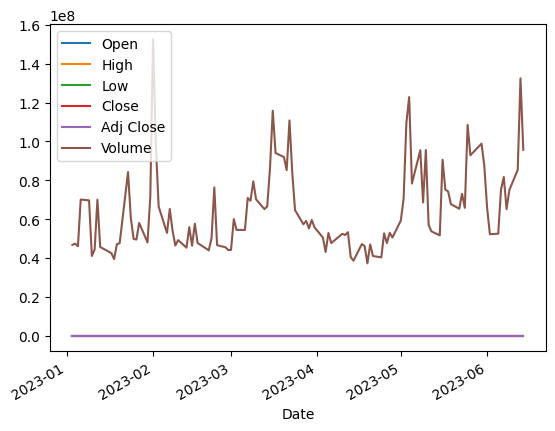

In [32]:
# df_data = pd.read_csv('https://raw.githubusercontent.com/Tegar11-F/Data-Set/main/AMD.csv')
df_data.plot()

In [33]:
df_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,66.000000,66.879997,63.590000,64.019997,64.019997,46851800
2023-01-04,65.000000,65.790001,63.310001,64.660004,64.660004,47477100
2023-01-05,64.150002,64.349998,62.299999,62.330002,62.330002,46159500
2023-01-06,63.150002,64.300003,60.049999,63.959999,63.959999,70161300
2023-01-09,66.220001,69.320000,65.669998,67.239998,67.239998,69741300


In [34]:
df_data.shape

(113, 6)

In [35]:
df_passenger= df_data['Close']

In [36]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [37]:
n_steps = 5
X, y = split_sequence(df_passenger, n_steps)

In [38]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [39]:
# df_X.head()
# df_y.head()
df.head(3)

,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,64.019997,64.660004,62.330002,63.959999,67.239998,68.050003
1,64.660004,62.330002,63.959999,67.239998,68.050003,69.059998
2,62.330002,63.959999,67.239998,68.050003,69.059998,70.800003


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [41]:
X_norm

array([[0.02612048, 0.03601239, 0.        , 0.        , 0.        ],
       [0.03601239, 0.        , 0.02519316, 0.05028359, 0.01307514],
       [0.        , 0.02519316, 0.07588866, 0.06270127, 0.02937852],
       [0.02519316, 0.07588866, 0.08840806, 0.07818486, 0.05746578],
       [0.07588866, 0.08840806, 0.10401849, 0.10485978, 0.06069414],
       [0.08840806, 0.10401849, 0.13091193, 0.10792581, 0.07021789],
       [0.10401849, 0.13091193, 0.13400307, 0.11697067, 0.05310736],
       [0.13091193, 0.13400307, 0.14312202, 0.10072052, 0.00758678],
       [0.13400307, 0.14312202, 0.12673875, 0.05748888, 0.04568203],
       [0.14312202, 0.12673875, 0.08315298, 0.09366856, 0.14995965],
       [0.12673875, 0.08315298, 0.11962903, 0.19270273, 0.12041967],
       [0.08315298, 0.11962903, 0.21947446, 0.16464813, 0.12380961],
       [0.11962903, 0.21947446, 0.19119004, 0.16786761, 0.12784512],
       [0.21947446, 0.19119004, 0.1944359 , 0.1717002 , 0.13171918],
       [0.19119004, 0.1944359 , 0.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

In [43]:
# import knn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)

In [44]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

In [45]:
print('R-Squared:', model_knn.score(X_test, y_pred))

R-Squared: 1.0


In [46]:
from sklearn.metrics import mean_absolute_percentage_error

# Mengubah dimensi y_pred menjadi satu dimensi
y_pred = y_pred.flatten()

# Mengambil jumlah sampel yang sesuai
n_samples = min(len(y_test), len(y_pred))
y_test = y_test[:n_samples]
y_pred = y_pred[:n_samples]

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)


MAPE: 0.032873549401743904


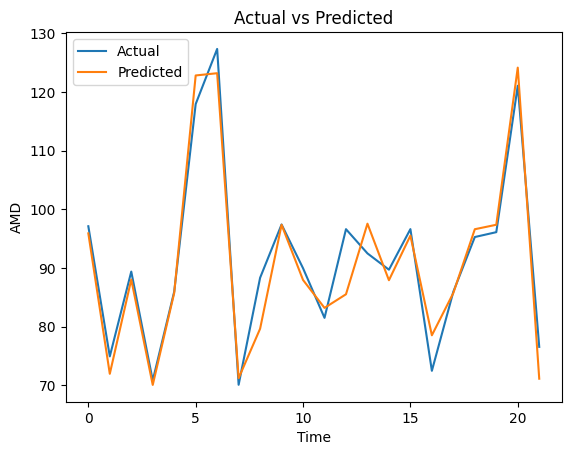

In [47]:
# Membuat grafik MAPE
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('AMD')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Inisialisasi dan latih model Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model_dt.predict(X_test)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:',mape)

MAPE: 0.03027785079634122


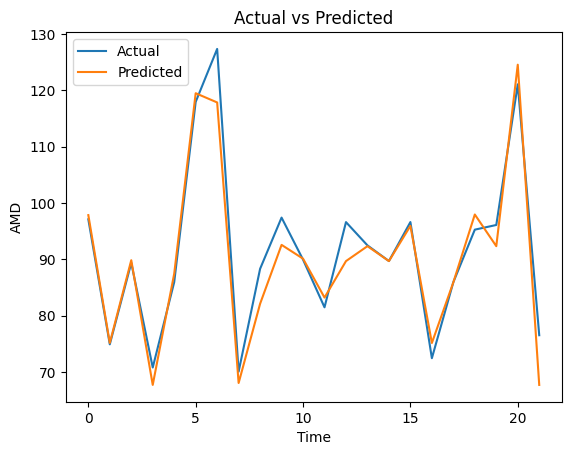

In [49]:
# Membuat grafik MAPE
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('AMD')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [53]:
# buat model MLP
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings

max_iter = 100
tolerance = 0.0001

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
    model = MLPRegressor(hidden_layer_sizes=(100, 100),max_iter=max_iter,tol=tolerance)

    # train model
    model.fit(X_train, y_train)

    # prediksi data test
    y_MLP = model.predict(X_test)

# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE MLP : %.3f' % mape)

MAPE MLP : 0.030


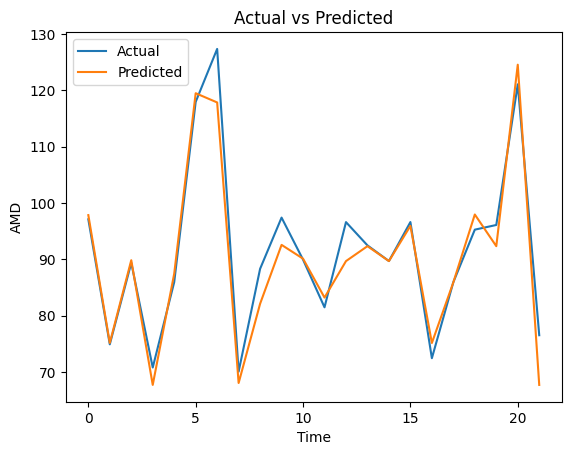

In [51]:
# Membuat grafik MAPE
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('AMD')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [52]:
pred = model_knn.predict(np.array([[46851800,	47477100,	46159500,	70161300,	69741300]]))
pred

array([121.77600098])